In [18]:
import pandas as pd
df=pd.read_csv("breastcancer.csv")
df.head()
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
X = df.iloc[:,2:]
y=df.iloc[:,1]

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [22]:
xs=pd.DataFrame(scale(X))

In [23]:
xs.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [24]:
X.shape

(569, 30)

In [27]:
pca = PCA(n_components=10)
proj = pca.fit_transform(xs)
newx = pd.DataFrame(proj)

In [28]:
nk = [10,15,20,25]

In [29]:
res_df=list()
for i in nk:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(proj,y)
    pred = model.predict(newx)
    tmp = list()
    tmp.append(metrics.accuracy_score(y,pred))
    tmp.append(metrics.precision_score(y,pred,average="weighted"))
    tmp.append(metrics.recall_score(y,pred,average="weighted"))
    tmp.append(metrics.f1_score(y,pred,average="weighted"))
    print(tmp)
    res_df.append(tmp)

[0.9701230228471002, 0.9711230565172987, 0.9701230228471002, 0.969882532826048]
[0.9718804920913884, 0.9724697443810992, 0.9718804920913884, 0.971703377322005]
[0.9630931458699473, 0.964696296488607, 0.9630931458699473, 0.9627057584801598]
[0.961335676625659, 0.9631105302087363, 0.961335676625659, 0.9609054008172064]


In [30]:
res = pd.DataFrame(res_df).T
res.head()

,0,1,2,3
0,0.970123,0.971880,0.963093,0.961336
1,0.971123,0.972470,0.964696,0.963111
2,0.970123,0.971880,0.963093,0.961336
3,0.969883,0.971703,0.962706,0.960905


In [31]:
hmap=res
hmap.head()
res.head()

,0,1,2,3
0,0.970123,0.971880,0.963093,0.961336
1,0.971123,0.972470,0.964696,0.963111
2,0.970123,0.971880,0.963093,0.961336
3,0.969883,0.971703,0.962706,0.960905


In [32]:
res.columns= ['10','15','20','25']
res['Metric']=['Accuracy','Precission','Recall','F1_Score']
res.set_index(['Metric'],inplace=True)
res.head()

,10,15,20,25
Metric,,,,
Accuracy,0.970123,0.971880,0.963093,0.961336
Precission,0.971123,0.972470,0.964696,0.963111
Recall,0.970123,0.971880,0.963093,0.961336
F1_Score,0.969883,0.971703,0.962706,0.960905


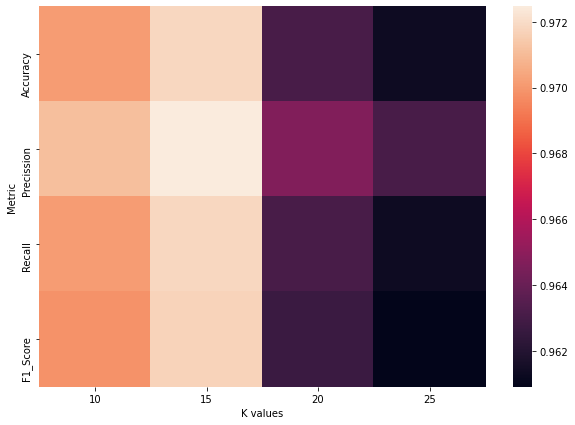

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(hmap)
plt.xlabel("K values")
plt.show()

In [44]:
@interact
def khmap(pc=IntSlider(min=2,max=30,value=10, continuous_update=False),
          start = IntSlider(min=1,max=25,value=5,continuous_update=False),
             diff = IntSlider(min=1,max=5,value=5,continuous_update=False)
             ):
    pca = PCA(n_components=pc)
    proj = pca.fit_transform(xs)
    newx = pd.DataFrame(proj)
    nk = [start,start+diff,start+2*diff,start+2*diff]
    res_df=list()
    for i in nk:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(proj,y)
        pred = model.predict(newx)
        tmp = list()
        tmp.append(metrics.accuracy_score(y,pred))
        tmp.append(metrics.precision_score(y,pred,average="weighted"))
        tmp.append(metrics.recall_score(y,pred,average="weighted"))
        tmp.append(metrics.f1_score(y,pred,average="weighted"))
        res_df.append(tmp)
    res = pd.DataFrame(res_df).T
    hmap=res
    res.columns= nk
    res['Metric']=['Accuracy','Precission','Recall','F1_Score']
    res.set_index(['Metric'],inplace=True)
    plt.figure(figsize=(10,7))
    sns.heatmap(hmap)
    plt.xlabel("K values")
    plt.show()

interactive(children=(IntSlider(value=10, continuous_update=False, description='pc', max=30, min=2), IntSlider…